In [292]:
# Import Libraries
import joblib
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor

plt.style.use({'figure.facecolor': 'white'})

In [293]:
# Read CSV
df = pd.read_csv('C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Data/Manual Readings of pH, EC and Temperature.csv').drop(['ppm'], 1)
df.head()

,Temperature,pH,Adjusted pH,EC
0,24.81,7.0,6.908699,0.82
1,25.31,7.0,6.978184,0.29
2,25.56,7.0,6.973090,0.48
3,25.75,7.0,6.935358,0.48
4,25.75,7.0,7.010641,0.47


In [294]:
df.describe()

,Temperature,pH,Adjusted pH,EC
count,252.000000,252.000000,252.000000,252.000000
mean,25.408373,6.366667,6.346189,1.711310
std,0.429798,0.390117,0.384282,0.670198
min,23.870000,5.800000,5.688092,0.270000
25%,25.120000,6.000000,6.034491,1.420000
50%,25.440000,6.500000,6.377082,1.810000
75%,25.690000,6.600000,6.611272,2.110000
max,26.250000,7.000000,7.066736,2.630000


In [295]:
df['Temperature'] = (df['Temperature'] - df['Temperature'].min()) / (df['Temperature'].max() - df['Temperature'].min())
# df['Temperature'] = (df['Temperature'] - df['Temperature'].mean()) / (df['Temperature'].max() - df['Temperature'].min())
#
df['pH'] = (df['pH'] - df['pH'].min()) / (df['pH'].max() - df['pH'].min())
# df['pH'] = (df['pH'] - df['pH'].mean()) / (df['pH'].max() - df['pH'].min())
#
df['Adjusted pH'] = (df['Adjusted pH'] - df['Adjusted pH'].min()) / (df['Adjusted pH'].max() - df['Adjusted pH'].min())
# df['Adjusted pH'] = (df['Adjusted pH'] - df['Adjusted pH'].mean()) / (df['Adjusted pH'].max() - df['Adjusted pH'].min())
#
df['EC'] = (df['EC'] - df['EC'].min()) / (df['EC'].max() - df['EC'].min())
# df['EC'] = (df['EC'] - df['EC'].mean()) / (df['EC'].max() - df['EC'].min())

# print(df['Temperature'])
# scaler = MinMaxScaler(feature_range=(0, 3))
# scaled_data = scaler.fit_transform(df.drop(['EC'], 1))
# df = pd.DataFrame({'Temperature': scaled_data[:, 0], 'pH': scaled_data[:, 1], 'Adjusted pH': scaled_data[:, 2], 'EC': df['EC']})
df.head()

,Temperature,pH,Adjusted pH,EC
0,0.394958,1.0,0.885367,0.233051
1,0.605042,1.0,0.935769,0.008475
2,0.710084,1.0,0.932074,0.088983
3,0.789916,1.0,0.904705,0.088983
4,0.789916,1.0,0.959311,0.084746


In [296]:
df.describe()

,Temperature,pH,Adjusted pH,EC
count,252.000000,252.000000,252.000000,252.000000
mean,0.646375,0.472222,0.477351,0.610724
std,0.180587,0.325097,0.278739,0.283982
min,0.000000,0.000000,0.000000,0.000000
25%,0.525210,0.166667,0.251261,0.487288
50%,0.659664,0.583333,0.499759,0.652542
75%,0.764706,0.666667,0.669629,0.779661
max,1.000000,1.000000,1.000000,1.000000


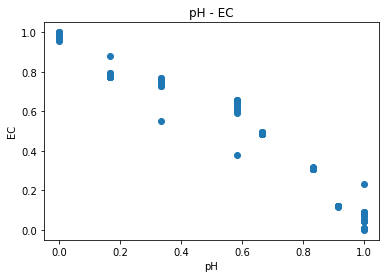

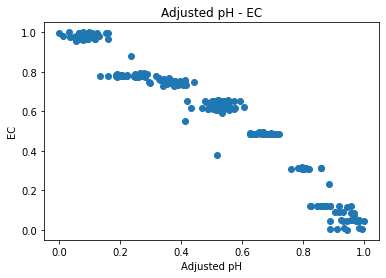

In [297]:
EC, pH, adjusted_pH = df[['EC']], df[['pH']], df[['Adjusted pH']]

# Plot between pH and EC
plt.scatter(pH, EC)
plt.title('pH - EC')
plt.xlabel('pH')
plt.ylabel('EC')
plt.show()

# Plot between Adjusted pH and EC
plt.scatter(adjusted_pH, EC)
plt.title('Adjusted pH - EC')
plt.xlabel('Adjusted pH')
plt.ylabel('EC')
plt.show()

In [298]:
# Extract Input Columns ( Adjusted pH, Temperature )
X_adjusted = df[['Adjusted pH', 'Temperature']]
X_adjusted.head()

,Adjusted pH,Temperature
0,0.885367,0.394958
1,0.935769,0.605042
2,0.932074,0.710084
3,0.904705,0.789916
4,0.959311,0.789916


In [299]:
# Extract Output Columns ( EC )
y_adjusted = df[['EC']]
y_adjusted.head()

,EC
0,0.233051
1,0.008475
2,0.088983
3,0.088983
4,0.084746


In [300]:
# Extract Input Columns ( Original pH, Temperature )
X_original = df[['pH', 'Temperature']]
X_original.head()

,pH,Temperature
0,1.0,0.394958
1,1.0,0.605042
2,1.0,0.710084
3,1.0,0.789916
4,1.0,0.789916


In [301]:
# Extract Output Columns ( EC )
y_original = df[['EC']]
y_original.head()

,EC
0,0.233051
1,0.008475
2,0.088983
3,0.088983
4,0.084746


In [302]:
# Split Train & Test Data For Both Adjusted & Original Values
X_adjusted_train, X_adjusted_test, y_adjusted_train, y_adjusted_test = train_test_split(X_adjusted, y_adjusted, random_state=1)
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original, y_original, random_state=1)

y_adjusted_train = y_adjusted_train.values.ravel()
y_adjusted_test = y_adjusted_test.values.ravel()

y_original_train = y_original_train.values.ravel()
y_original_test = y_original_test.values.ravel()

In [303]:
# Fit Two Models With Both Original & Adjusted Data
adjusted_data_model = MLPRegressor(random_state=1, max_iter=500, activation='relu', hidden_layer_sizes=(500, 250)).fit(X_adjusted_train, y_adjusted_train)
original_data_model = MLPRegressor(random_state=1, max_iter=500, activation='relu', hidden_layer_sizes=(500, 250)).fit(X_original_train, y_original_train)

In [304]:
# Generate Losses For Both Adjusted & Original Models
adjusted_data_model_loss = adjusted_data_model.loss_curve_
original_data_model_loss = original_data_model.loss_curve_

adjusted_data_model_iteration = list(range(1, len(adjusted_data_model_loss) + 1))
original_data_model_iteration = list(range(1, len(original_data_model_loss) + 1))

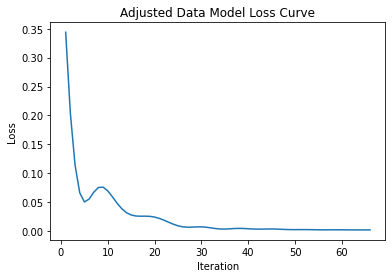

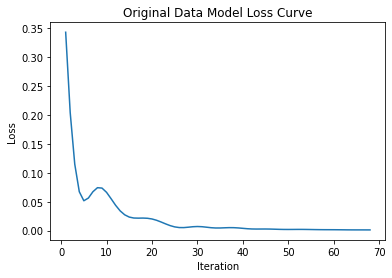

In [305]:
# Adjusted Data Model Loss Curve
plt.plot(adjusted_data_model_iteration, adjusted_data_model_loss)
plt.title('Adjusted Data Model Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Original Data Model Loss Curve
plt.plot(original_data_model_iteration, original_data_model_loss)
plt.title('Original Data Model Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [306]:
# Checking The R2 Score Of Both Models
adjusted_data_model_score = adjusted_data_model.score(X_adjusted_test, y_adjusted_test)
original_data_model_score = original_data_model.score(X_original_test, y_original_test)

print('Adjusted Data Model Score: ', adjusted_data_model_score)
print('Original Data Model Score: ', original_data_model_score)

Adjusted Data Model Score:  0.9609086690462765
Original Data Model Score:  0.968005519851097


In [307]:
# Saving The Models
joblib.dump(adjusted_data_model, 'C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/EC - pH Adjusted Data Model.h5')
joblib.dump(original_data_model, 'C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/EC - pH Original Data Model.h5')


['C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/EC - pH Original Data Model.h5']